In [145]:
import json
from thefuzz import fuzz
import matplotlib.pyplot as plt

In [146]:
# Read metadata of LNCS found in OpenAlex and Semantic Scholar

with open('../../../data/OpenAlex_LNCS.json', 'r', encoding="utf-8") as file:
    OpenAlex_LNCS = json.load(file)

with open('../../../data/SemanticScholar_LNCS.json', 'r', encoding="utf-8") as file:
    Semantic_Scholar_LNCS = json.load(file)

In [ ]:
# List of all LNCS IDs that were found in at least one of each source

total_document_ids_found = list(set(list(OpenAlex_LNCS.keys()) + list(Semantic_Scholar_LNCS.keys())))

In [148]:
# List of all LNCS IDs that were found in both sources

shared_ids_between_sources = list(set(OpenAlex_LNCS.keys()) & set(Semantic_Scholar_LNCS.keys()))

In [149]:
len(shared_ids_between_sources)

1216

In [150]:
# Combine the citation data from both sources in nested list

merged_citation_data = []
for i in shared_ids_between_sources:
    citation_info = [i]
    try:
        citation_info.append(OpenAlex_LNCS[i]["cited_by_count"])
    except:
        citation_info.append(None)
    try:
        citation_info.append(int(Semantic_Scholar_LNCS[i]["citationCount"]))
    except:
        citation_info.append(None)
    merged_citation_data.append(citation_info)

In [151]:
merged_citation_data

[['lncs_96', 8, 7],
 ['lncs_128', 18, 30],
 ['lncs_1019', 3, 2],
 ['lncs_716', 0, 0],
 ['lncs_156', 4, 9],
 ['lncs_566', 8, 15],
 ['lncs_1088', 2, 3],
 ['lncs_1074', 17, 48],
 ['lncs_456', 6, 5],
 ['lncs_1144', 13, 17],
 ['lncs_1209', 4, 6],
 ['lncs_1109', 12, 25],
 ['lncs_969', 5, 5],
 ['lncs_277', 10, 24],
 ['lncs_914', 6, 7],
 ['lncs_632', 0, 2],
 ['lncs_668', 0, 1],
 ['lncs_471', 0, 0],
 ['lncs_428', 2, 5],
 ['lncs_1065', 2, 3],
 ['lncs_1215', 3, 9],
 ['lncs_265', 2, 3],
 ['lncs_17', 7, 10],
 ['lncs_558', 6, 9],
 ['lncs_937', 6, 13],
 ['lncs_458', 18, 21],
 ['lncs_856', 3, 6],
 ['lncs_935', 11, 21],
 ['lncs_1068', 2, 6],
 ['lncs_119', 0, 2],
 ['lncs_888', 1, 1],
 ['lncs_608', 4, 4],
 ['lncs_32', 4, 4],
 ['lncs_154', 2, 4],
 ['lncs_344', 1, 5],
 ['lncs_229', 89, 168],
 ['lncs_311', 2, 3],
 ['lncs_481', 18, 18],
 ['lncs_1083', 11, 30],
 ['lncs_455', 21, 31],
 ['lncs_1211', 1, 3],
 ['lncs_1048', 4, 8],
 ['lncs_787', 5, 8],
 ['lncs_1277', 18, 36],
 ['lncs_257', 8, 13],
 ['lncs_60', 93,

In [152]:
# Calculate the ranks based on the citation data

sorted_data_by_first = sorted(merged_citation_data, key=lambda x: (x[1], x[0]), reverse=True)
rank = 1
for item in sorted_data_by_first:
    item.append(rank)
    rank += 1

sorted_data_by_second = sorted(merged_citation_data, key=lambda x: (x[2], x[0]), reverse=True)
rank = 1
for item in sorted_data_by_second:
    item.append(rank)
    rank += 1

In [153]:
with open('../../../data/OpenAlex_LNCS_citing_doc.json', 'r', encoding="utf-8") as file:
    OpenAlex_LNCS_addition = json.load(file)

In [154]:
with open('../../../data/SemanticScholar_LNCS_additional_metadata.json', 'r', encoding="utf-8") as file:
    Semantic_LNCS_addition = json.load(file)

In [155]:
combined_citation_titles = []
for i in shared_ids_between_sources:
    citation_titles_for_id  = [i]
    try:
        citations_oa = []
        for j in OpenAlex_LNCS_addition[i]:
            if j["title"] is not None:
                citations_oa.append(j["title"])
        citation_titles_for_id .append(citations_oa)
    except:
        print("OpenAlex None")
        citation_titles_for_id .append(None)
    try:
        citations_ss = []
        for k in Semantic_LNCS_addition[i]["citations"]:
            if k["title"] is not None:
                citations_ss.append(k["title"])
        citation_titles_for_id .append(citations_ss)
    except:
       
        citation_titles_for_id.append(None)
    combined_citation_titles.append(citation_titles_for_id )

In [156]:
combined_citation_titles

[['lncs_96',
  ['On Clustering and Evaluation of Narrow Domain Short-Test Corpora',
   'A comparison of methods for the automatic identification of locations in wikipedia',
   'A Competitive Term Selection Method for Information Retrieval',
   'Overview of WebCLEF 2005',
   'Using Query-Relevant Documents Pairs for Cross-Lingual Information Retrieval',
   'BUAP-UPV TPIRS: A System for Document Indexing Reduction at WebCLEF',
   'On Clustering and Evaluation of Narrow Domain Short-Text Corpora',
   'A Penalisation-Based Ranking Approach for the Mixed Monolingual Task of WebCLEF 2006',
   'Vocabulary Reduction and Text Enrichment at WebCLEF'],
  ['A Competitive Term Selection Method for Information Retrieval',
   'A comparison of methods for the automatic identification of locations in wikipedia',
   'Vocabulary Reduction and Text Enrichment at WebCLEF',
   'A Penalisation-Based Ranking Approach for the Mixed Monolingual Task of WebCLEF 2006',
   'Overview of WebCLEF 2005',
   'On Cluste

In [157]:
# Collect the document IDs that have at least one citing title in each source
non_empty_citation_lists  = []
for i in combined_citation_titles:
    if len(i[1]) > 0 and len(i[2]) > 0:
        non_empty_citation_lists.append(i)

In [158]:
len(non_empty_citation_lists)

1102

In [159]:
# Count the amount of titles of both sources that are similar enough to pass the threshold for the fuzzy matching

def count_overlaps(list1, list2):
    count = 0
    for item1 in list1:
        for item2 in list2:
            if fuzz.ratio(item1, item2) > 60: 
                count += 1
                break  
    return count

for inner_list in non_empty_citation_lists :
    overlap_count = count_overlaps(inner_list[1], inner_list[2])
    inner_list.append((overlap_count/(len(inner_list[1]) + len(inner_list[2])))*100)


In [160]:
# Calculate the differences between the Citation counts of the two sources and adds it to the nested list
for i in non_empty_citation_lists:
    i.append(Semantic_Scholar_LNCS[i[0]]["citationCount"] - OpenAlex_LNCS[i[0]]["cited_by_count"])
             

In [162]:
x_values = [item[1] for item in merged_citation_data]
y_values = [item[2] for item in merged_citation_data]
x_values_2 = [item[3] for item in merged_citation_data]
y_values_2 = [item[4] for item in merged_citation_data]
x_values_3 = [item[3] for item in merged_citation_data if item[3] <= 100][:100]
y_values_3 = [item[4] for item in merged_citation_data if item[4] <= 100][:100]
x_values_4 = [item[4] for item in non_empty_citation_lists]
y_values_4 = [item[3] for item in non_empty_citation_lists]

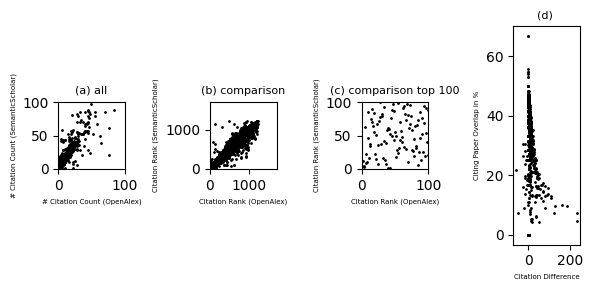

In [164]:
axis_limit_1 = 100  # Beispielwert, passe dies an den größten Wert an
axis_limit_2 = 1700
axis_limit_3 = 100
#axis_limit_3 = 100
fig, axs = plt.subplots(1, 4, figsize=(6, 3))

# Erster Scatterplot (Vergleich der Werte 1 und 2)
axs[0].scatter(x_values, y_values, color='black',s=1)
axs[0].set_xlabel('# Citation Count (OpenAlex)', fontsize=5)
axs[0].set_ylabel('# Citation Count (SemanticScholar)', fontsize=5)
axs[0].set_title('(a) all', fontsize=8)
axs[0].set_xlim(0, axis_limit_1)
axs[0].set_ylim(0, axis_limit_1)
axs[0].set_aspect('equal', adjustable='box')

# Zweiter Scatterplot (Vergleich der Werte 3 und 4)
axs[1].scatter(x_values_2, y_values_2, color='black',s=1)
axs[1].set_xlabel('Citation Rank (OpenAlex)', fontsize=5)
axs[1].set_ylabel('Citation Rank (SemanticScholar)', fontsize=5)
axs[1].set_title('(b) comparison', fontsize=8)
axs[1].set_xlim(0, axis_limit_2)
axs[1].set_ylim(0, axis_limit_2)
axs[1].set_aspect('equal', adjustable='box')

# Zweiter Scatterplot (Vergleich der Werte 3 und 4)
axs[2].scatter(x_values_3, y_values_3, color='black',s=1)
axs[2].set_xlabel('Citation Rank (OpenAlex)', fontsize=5)
axs[2].set_ylabel('Citation Rank (SemanticScholar)', fontsize=5)
axs[2].set_title('(c) comparison top 100', fontsize=8)
axs[2].set_xlim(0, axis_limit_3)
axs[2].set_ylim(0, axis_limit_3)
axs[2].set_aspect('equal', adjustable='box')

# Zweiter Scatterplot (Vergleich der Werte 3 und 4)
axs[3].scatter(x_values_4, y_values_4, color='black',s=1)
axs[3].set_ylabel('Citing Paper Overlap in %', fontsize=5)
axs[3].set_xlabel('Citation Difference', fontsize=5)
axs[3].set_title('(d) ', fontsize=8)

plt.tight_layout()
plt.savefig('../../../images/scatterplots_lncs.png', dpi=300)  # Save the figure as a PNG file with 300 dpi

plt.show()